0. Use GPU for faster computing.

In [1]:
import tensorflow as tf
import torch
print("GPU available:", torch.cuda.is_available())
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2024-12-17 11:14:27.224337: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 11:14:27.834607: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-17 11:14:29.601225: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU available: True
TensorFlow version: 2.16.1
Num GPUs Available:  0


2024-12-17 11:14:36.026065: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-17 11:14:36.032102: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1. Run on CLASSIC DATA

1.1 Import CLASSIC DATA

In [ ]:
#FOR CLASSIC DATA ORDERING

import numpy as np
import pooch
import tensorflow as tf
import os
import random
import shutil
from pathlib import Path
import pandas as pd

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# Define paths
base_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Copy_full_fish_dataset')
#base_dir = Path(r'C:\Users\bapti\Downloads\Mask_creation')
output_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Data_ready')
#output_dir = Path(r'C:\Users\bapti\Downloads\Mask_data_ready')
train_dir = output_dir / 'Train'
valid_dir = output_dir / 'Valid'
test_dir = output_dir / 'Test'

# Ensure output directories exist
for path in [train_dir, valid_dir, test_dir]:
    path.mkdir(parents=True, exist_ok=True)

# Collect all images with metadata
data = []
test_data = []

for class_name in ["LEFT", "RIGHT"]:
    class_dir = base_dir / class_name
    for species_name in ["Grayling", "Trout"]:
        species_dir = class_dir / species_name
        for date_folder in species_dir.iterdir():
            if date_folder.is_dir():
                date = date_folder.name
                for image_file in date_folder.glob('*.*'):
                    # Store metadata with each image path
                    item = {
                        "path": image_file,
                        "class": class_name,
                        "species": species_name,
                        "date": date
                    }
                    # Assign test data based on specified conditions
                    if (species_name == "Grayling" and date == "Day_35") or \
                       (species_name == "Trout" and date == "Day_146"):
                        test_data.append(item)
                    else:
                        data.append(item)

# Shuffle data for random splitting
random.seed(123)  # For reproducibility
random.shuffle(data)

# Split remaining data into train (85%) and validation (15%)
total_count = len(data)
train_count = int(0.85 * total_count)

train_data = data[:train_count]
valid_data = data[train_count:]

# Convert lists of metadata to DataFrames for easier access
train_df = pd.DataFrame(train_data)
valid_df = pd.DataFrame(valid_data)
test_df = pd.DataFrame(test_data)

# Save metadata DataFrames to CSV files for future use
train_df.to_csv(output_dir / 'train_metadata.csv', index=False)
valid_df.to_csv(output_dir / 'valid_metadata.csv', index=False)
test_df.to_csv(output_dir / 'test_metadata.csv', index=False)

# Function to copy images to output directory with new structure
def copy_images(data_split, target_dir):
    for item in data_split:
        target_class_dir = target_dir / item["class"]
        target_species_dir = target_class_dir / item["species"]
        target_species_dir.mkdir(parents=True, exist_ok=True)
        
        # Copy image to the new directory, preserving original filename
        shutil.copy(item["path"], target_species_dir / item["path"].name)

# Copy images to respective folders
copy_images(train_data, train_dir)
copy_images(valid_data, valid_dir)
copy_images(test_data, test_dir)

# Load the datasets from the new directories
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  # Specify your desired image size
    batch_size=32,          # Specify your desired batch size
    seed=123,
)

valid_set = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=123,
)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=123,
)

train_set.name = 'Training'
valid_set.name = 'Validation'
test_set.name = 'Test'

# Print class names and dataset sizes
class_names = train_set.class_names
print("Class names:", class_names)
print("Training dataset size:", len(train_set))
print("Validation dataset size:", len(valid_set))
print("Test dataset size:", len(test_set))

# Print number of test images
print("\n","Total number of images in the input dataset:", "\n","train + valid:",len(data), "\n","test:",len(test_data))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bapti\\Downloads\\Mask_creation/LEFT/Grayling'

In [ ]:

# #FOLLOWING CODE FOR CLASSIC DATA WITHOUT ORDERING (IF THE ORDERING HAS ALREADY BEEN DONE WITH THE ABOVE CELL)

# from PIL import Image
# import tensorflow as tf
# import os
# import random
# import shutil
# from pathlib import Path
# import pandas as pd

# # Define paths
# base_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Copy_full_fish_dataset')
# #base_dir = Path(r'C:\Users\bapti\Downloads\Mask_creation')
# output_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Data_ready')
# #output_dir = Path(r'C:\Users\bapti\Downloads\Mask_data_ready')

# #For Ubuntu: 
# base_dir = Path('/mnt/c/Users/bapti/Downloads/ML_Project/Copy_full_fish_dataset')
# output_dir = Path('/mnt/c/Users/bapti/Downloads/ML_Project/Data_ready')

# train_dir = output_dir / 'Train'
# valid_dir = output_dir / 'Valid'
# test_dir = output_dir / 'Test'

# # Ensure output directories exist
# for path in [train_dir, valid_dir, test_dir]:
#     path.mkdir(parents=True, exist_ok=True)

# # Collect all images with metadata
# data = []
# test_data = []

# for class_name in ["LEFT", "RIGHT"]:
#     class_dir = base_dir / class_name
#     for species_name in ["Grayling", "Trout"]:
#         species_dir = class_dir / species_name
#         for date_folder in species_dir.iterdir():
#             if date_folder.is_dir():
#                 date = date_folder.name
#                 for image_file in date_folder.glob('*.*'):
#                     # Store metadata with each image path
#                     item = {
#                         "path": image_file,
#                         "class": class_name,
#                         "species": species_name,
#                         "date": date
#                     }
#                     # Assign test data based on specified conditions
#                     if (species_name == "Grayling" and date == "Day_35") or \
#                        (species_name == "Trout" and date == "Day_146"):
#                         test_data.append(item)
#                     else:
#                         data.append(item)

# #FOR CLASSIC DATA ORDERING

# import tensorflow as tf
# import os
# import random
# import shutil
# from pathlib import Path
# import pandas as pd

# # Define paths
# #base_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Copy_full_fish_dataset')
# base_dir = Path(r'C:\Users\bapti\Downloads\Mask_creation')
# #output_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Data_ready')
# output_dir = Path(r'C:\Users\bapti\Downloads\Mask_data_ready')
# train_dir = output_dir / 'Train'
# valid_dir = output_dir / 'Valid'
# test_dir = output_dir / 'Test'

# # Ensure output directories exist
# for path in [train_dir, valid_dir, test_dir]:
#     path.mkdir(parents=True, exist_ok=True)

# # Collect all images with metadata
# data = []
# test_data = []

# for class_name in ["LEFT", "RIGHT"]:
#     class_dir = base_dir / class_name
#     for species_name in ["Grayling", "Trout"]:
#         species_dir = class_dir / species_name
#         for date_folder in species_dir.iterdir():
#             if date_folder.is_dir():
#                 date = date_folder.name
#                 for image_file in date_folder.glob('*.*'):
#                     # Store metadata with each image path
#                     item = {
#                         "path": image_file,
#                         "class": class_name,
#                         "species": species_name,
#                         "date": date
#                     }
#                     # Assign test data based on specified conditions
#                     if (species_name == "Grayling" and date == "Day_35") or \
#                        (species_name == "Trout" and date == "Day_146"):
#                         test_data.append(item)
#                     else:
#                         data.append(item)

# # Shuffle data for random splitting
# random.seed(123)  # For reproducibility
# random.shuffle(data)

# # Split remaining data into train (85%) and validation (15%)
# total_count = len(data)
# train_count = int(0.85 * total_count)

# train_data = data[:train_count]
# valid_data = data[train_count:]

# # Convert lists of metadata to DataFrames for easier access
# train_df = pd.DataFrame(train_data)
# valid_df = pd.DataFrame(valid_data)
# test_df = pd.DataFrame(test_data)

# # Save metadata DataFrames to CSV files for future use
# train_df.to_csv(output_dir / 'train_metadata.csv', index=False)
# valid_df.to_csv(output_dir / 'valid_metadata.csv', index=False)
# test_df.to_csv(output_dir / 'test_metadata.csv', index=False)

# # Function to copy images to output directory with new structure
# def copy_images(data_split, target_dir):
#     for item in data_split:
#         target_class_dir = target_dir / item["class"]
#         target_species_dir = target_class_dir / item["species"]
#         target_species_dir.mkdir(parents=True, exist_ok=True)
        
#         # Copy image to the new directory, preserving original filename
#         shutil.copy(item["path"], target_species_dir / item["path"].name)

# # Copy images to respective folders
# copy_images(train_data, train_dir)
# copy_images(valid_data, valid_dir)
# copy_images(test_data, test_dir)

# # Load the datasets from the new directories
# train_set = tf.keras.preprocessing.image_dataset_from_directory(
#     train_dir,
#     image_size=(256, 256),  # Specify your desired image size
#     batch_size=32,          # Specify your desired batch size
#     seed=123,
# )

# valid_set = tf.keras.preprocessing.image_dataset_from_directory(
#     valid_dir,
#     image_size=(256, 256),
#     batch_size=32,
#     seed=123,
# )

# test_set = tf.keras.preprocessing.image_dataset_from_directory(
#     test_dir,
#     image_size=(256, 256),
#     batch_size=32,
#     seed=123,
# )

# train_set.name = 'Training'
# valid_set.name = 'Validation'
# test_set.name = 'Test'

# # Print class names and dataset sizes
# class_names = train_set.class_names
# print("Class names:", class_names)
# print("Training dataset size:", len(train_set))
# print("Validation dataset size:", len(valid_set))
# print("Test dataset size:", len(test_set))

# # Print number of test images
# print("\n","Total number of images in the input dataset:", "\n","train + valid:",len(data), "\n","test:",len(test_data))

1.2. Preprocess Data for Baseline and Augmented Baseline

In [144]:
#PREPROCESSING FOR THE BASELINE MODELS:
def preprocessing_function(image, label):

    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0
    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label

train = train_set.map(preprocessing_function)
validation = valid_set.map(preprocessing_function)
test = test_set.map(preprocessing_function)


1.3. Runs for the Baseline

1.3.1 Define Baseline callback

In [46]:
def get_CNN_logdir():
    time = np.datetime64('now').astype(str)[:-3].replace(':', '-')
    run_logdir = os.path.join(os.curdir, "Final_CNN_logs", f"Baseline_run_on_classic_data{time}") # time goes in the fstring
    return run_logdir


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Baseline_run_on_classic_data.keras",
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())

# Let's clear out the backend and set our random seeds.
# Consistency is key :)
keras.backend.clear_session()
tf.random.set_seed(rnd_seed)
np.random.seed(rnd_seed)


1.3.2 Build Baseline architecture

In [47]:
model = keras.models.Sequential([
    # Convolution 1
    keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu"),
    keras.layers.MaxPool2D((3,3)),

    # Convolution 2
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 3
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 4
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax") #Change the last layer from 5 classes to 2 classes
])

In [48]:
model.build((None, 256 , 256, 3))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

1.3.3 Training the Baseline model

In [49]:
import datetime
import tensorflow as tf

# Adjust timestamp to avoid colons
timestamp = datetime.datetime.now().strftime("%Y-%m-%dT%H_%M_%S")
log_dir = f".\\Final_CNN_logs\\Baseline_run_on_classic_data{timestamp}"

#For Ubuntu 
log_dir = Path(f"Final_CNN_logs/Baseline_run_on_classic_data{timestamp}")
log_dir_str = log_dir.as_posix()

# Define TensorBoard callback with corrected log directory path
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Now run the model training
history = model.fit(train, # Training data generator
                    epochs=30,
                    validation_data=validation, # Validation data generator
                    callbacks=[early_stopping_cb,
                               checkpoint_cb,
                               tensorboard_cb])

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.5175 - loss: 0.7759 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 108s 692ms/step - accuracy: 0.5151 - loss: 0.6931 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 108s 692ms/step - accuracy: 0.5150 - loss: 0.6932 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 107s 690ms/step - accuracy: 0.5173 - loss: 0.6927 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 107s 689ms/step - accuracy: 0.5163 - loss: 0.6928 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 107s 689ms/step - accuracy: 0.5155 - loss: 0.6933 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 107s 690ms/step - accuracy: 0.5178 - loss: 0.6927 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 107s 685ms/step - accuracy: 0.5137 - lo

1.4. Runs for the Augmented Baseline

1.4.1 Define callback Augmented Baseline

In [50]:
keras.backend.clear_session()
tf.random.set_seed(rnd_seed)
np.random.seed(rnd_seed)

In [51]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Augmented_run_on_classic_data.keras",
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())

1.4.2 Build Augmented Baseline architecture

In [52]:
aug_model = keras.models.Sequential([
    #keras.layers.RandomFlip(), # Flip augmentation removed 
    keras.layers.RandomRotation(0.08), # Rotation Aumentation
    #keras.layers.RandomBrightness([0.2,1.0]),
    keras.layers.RandomContrast(0.9),
    keras.layers.RandomTranslation(-0.08,0.08),
    keras.layers.GaussianNoise( 0.1 , seed =42),
    # Convolution 1
    keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu"),
    keras.layers.MaxPool2D((3,3)),

    # Convolution 2
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 3
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 4
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax") #Change the last layer from 5 classes to 2 classes

    # Copy your previous model's layers here
])
aug_model.build((None, 256 , 256, 3))

In [53]:
import tensorflow
from tensorflow.keras.optimizers import Adam


# Set a custom learning rate
learning_rate = 0.001  # Try different values: 0.0001, 0.001, 0.005, etc.
optimizer = Adam(learning_rate=learning_rate)

#changed optimizer = "adam" to this:
aug_model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])

1.4.3 Training Augmented Baseline

In [54]:


import datetime

# Generate a valid directory path
log_dir = f".\\Final_CNN_logs\\Augmented_run_on_classic_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}"
#For Ubuntu
log_dir = Path(f"Final_CNN_logs/Augmented_run_on_classic_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}")
log_dir_str = log_dir.as_posix()
#
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

history = aug_model.fit(train, # Training data generator
                    epochs=30,
                    validation_data=validation, # Validation data generator
                    callbacks=[early_stopping_cb,
                               checkpoint_cb,
                               tensorboard_cb])

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.4854 - loss: 1.0592 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 112s 718ms/step - accuracy: 0.5167 - loss: 0.6929 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 126s 813ms/step - accuracy: 0.5137 - loss: 0.6930 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 123s 792ms/step - accuracy: 0.5160 - loss: 0.6928 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 126s 809ms/step - accuracy: 0.5136 - loss: 0.6928 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 112s 721ms/step - accuracy: 0.5137 - loss: 0.6929 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 113s 723ms/step - accuracy: 0.5187 - loss: 0.6929 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 113s 724ms/step - accuracy: 0.5153 - lo

1.5. Save the best models for Baseline and Augmented

In [55]:
import os
print(os.listdir())

current_directory = os.getcwd()
print(current_directory)
model.save('Baseline_run_on_classic_data.h5')
aug_model.save('Augmented_run_on_classic_data.h5')

# Let's load the models!
non_aug_model = keras.models.load_model(r'Baseline_run_on_classic_data.h5')
aug_model = keras.models.load_model(r'Augmented_run_on_classic_data.h5')

# And test them on the testing dataset
non_aug_model.evaluate(test)
aug_model.evaluate(test)

['50_epoch_models', 'Augmented_run_on_classic_data.h5', 'Augmented_run_on_classic_data.keras', 'Augmented_run_on_mask_data.h5', 'Baseline_run_on_classic_data.h5', 'Baseline_run_on_classic_data.keras', 'Baseline_run_on_mask_data.h5', 'CNN_logs', 'CNN_ResNet_classic_data.h5', 'CNN_ResNet_mask_data.h5', 'Copy_full_fish_dataset', 'Data_ready', 'Final_CNN_logs', 'images', 'Mask_data_ready', 'mp4_to_mp3.py', 'Obsolete_Data_to_be_hand_classified', 'Obsolete_DAY0_fish_dataset', 'Obsolete_Fish_Mask_Output', 'ResNet.ipynb', 'S5_1_CNNs_Brown_trout_data.ipynb', 'Segment_Anything_SAM.py', 'test_ZF_Net.py']
/mnt/c/Users/bapti/Downloads/ML_Project


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.4846 - loss: 0.6947
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.4776 - loss: 0.6951


[0.6942036747932434, 0.4911032021045685]

1.6. Preprocess for ResNet 

In [147]:
def preprocessing_function(image, label):
    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Resize the image to (224, 224) for ResNet50
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0

    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label

train = train_set.map(preprocessing_function)
valid = valid_set.map(preprocessing_function)
test = test_set.map(preprocessing_function)

In [57]:

for images, labels in train.take(1):
  print(f'Images shape: {images.numpy().shape} Labels: {labels.numpy().shape}')

Images shape: (32, 224, 224, 3) Labels: (32, 2)


2024-11-30 19:06:30.056657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1.7. Run for ResNet


1.7.1 Define Callback

In [ ]:
def get_CNN_logdir():
    time = np.datetime64('now').astype(str)[:-3].replace(':', '-')
    run_logdir = os.path.join(os.curdir, "Final_CNN_logs", f"ResNet_no_weight_run_on_classic_data{time}") # change "ResNet_no_weight_run_on_classic_data{time}" to f"ResNet_with_weight_run_on_classic_data{time}" 
    return run_logdir


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("CNN_ResNet_no_weight_classic_data.keras", # change "CNN_ResNet_no_weight_classic_data.keras" to "CNN_ResNet_with_weight_classic_data.keras" 
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())


1.7.2 Import ResNet model with or without weights and train model

In [136]:
# Let's clear out the backend and set our random seeds.
# Consistency is key :)
keras.backend.clear_session()
tf.random.set_seed(rnd_seed)
np.random.seed(rnd_seed)

n_classes = 2

# Load ResNet50 with no top layers (without classification layers)
#base_model = keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)) #Change to Weight or No Weight
base_model = keras.applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

# Freeze the base model
for layer in base_model.layers[-10:]:
    layer.trainable = False
# base_model.trainable = False

inputs = train.map(lambda image, label: (image, label))


optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01) 
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]) 

import datetime

# Generate a valid directory path

log_dir = f".\\Final_CNN_logs\\ResNet_no_weight_run_on_classic_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}" # change "ResNet_no_weight_run_on_classic_data{time}" to f"ResNet_with_weight_run_on_classic_data{time}" 

#For Ubuntu
log_dir = Path(f"Final_CNN_logs/ResNet_no_weight_run_on_classic_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}") # change "ResNet_no_weight_run_on_classic_data{time}" to f"ResNet_with_weight_run_on_classic_data{time}" 
log_dir_str = log_dir.as_posix()

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
history = model.fit(train, epochs=30, validation_data=valid, callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])



Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.5032 - loss: 1.5768 - val_accuracy: 0.4794 - val_loss: 0.7150
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.5165 - loss: 0.7909 - val_accuracy: 0.5641 - val_loss: 0.6859
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.7230 - loss: 0.6024 - val_accuracy: 0.7311 - val_loss: 0.4868
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9020 - loss: 0.2356 - val_accuracy: 0.8398 - val_loss: 0.3524
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.9297 - loss: 0.1340 - val_accuracy: 0.5744 - val_loss: 1.5413
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9414 - loss: 0.1242 - val_accuracy: 0.9302 - val_loss: 0.1079
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9462 - loss: 0.0997 - val_accuracy: 0.9703 - val_loss: 0.0755
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9693 - loss: 0.0790 - val_accu

1.7.3 Save best ResNet model with or without weights 

In [137]:
model.save('CNN_ResNet_no_weight_classic_data.h5')
#model.save('CNN_ResNet_with_weight_classic_data.h5')

2. Run on Mask Data

2.1. Import Mask Data

In [ ]:
#FOR MASK DATA ORDERING

import numpy as np
import pooch
import tensorflow as tf
import os
import random
import shutil
from pathlib import Path
import pandas as pd

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# Define paths
#base_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Copy_full_fish_dataset')
base_dir = Path(r'C:\Users\bapti\Downloads\Mask_creation')
#output_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Data_ready')
output_dir = Path(r'C:\Users\bapti\Downloads\Mask_data_ready')
train_dir = output_dir / 'Train'
valid_dir = output_dir / 'Valid'
test_dir = output_dir / 'Test'

# Ensure output directories exist
for path in [train_dir, valid_dir, test_dir]:
    path.mkdir(parents=True, exist_ok=True)

# Collect all images with metadata
data = []
test_data = []

for class_name in ["LEFT", "RIGHT"]:
    class_dir = base_dir / class_name
    for species_name in ["Grayling", "Trout"]:
        species_dir = class_dir / species_name
        for date_folder in species_dir.iterdir():
            if date_folder.is_dir():
                date = date_folder.name
                for image_file in date_folder.glob('*.*'):
                    # Store metadata with each image path
                    item = {
                        "path": image_file,
                        "class": class_name,
                        "species": species_name,
                        "date": date
                    }
                    # Assign test data based on specified conditions
                    if (species_name == "Grayling" and date == "Day_35") or \
                       (species_name == "Trout" and date == "Day_146"):
                        test_data.append(item)
                    else:
                        data.append(item)

# Shuffle data for random splitting
random.seed(123)  # For reproducibility
random.shuffle(data)

# Split remaining data into train (85%) and validation (15%)
total_count = len(data)
train_count = int(0.85 * total_count)

train_data = data[:train_count]
valid_data = data[train_count:]

# Convert lists of metadata to DataFrames for easier access
train_df = pd.DataFrame(train_data)
valid_df = pd.DataFrame(valid_data)
test_df = pd.DataFrame(test_data)

# Save metadata DataFrames to CSV files for future use
train_df.to_csv(output_dir / 'train_metadata.csv', index=False)
valid_df.to_csv(output_dir / 'valid_metadata.csv', index=False)
test_df.to_csv(output_dir / 'test_metadata.csv', index=False)

# Function to copy images to output directory with new structure
def copy_images(data_split, target_dir):
    for item in data_split:
        target_class_dir = target_dir / item["class"]
        target_species_dir = target_class_dir / item["species"]
        target_species_dir.mkdir(parents=True, exist_ok=True)
        
        # Copy image to the new directory, preserving original filename
        shutil.copy(item["path"], target_species_dir / item["path"].name)

# Copy images to respective folders
copy_images(train_data, train_dir)
copy_images(valid_data, valid_dir)
copy_images(test_data, test_dir)

# Load the datasets from the new directories
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  # Specify your desired image size
    batch_size=32,          # Specify your desired batch size
    seed=123,
)

valid_set = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=123,
)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    seed=123,
)

train_set.name = 'Training'
valid_set.name = 'Validation'
test_set.name = 'Test'

# Print class names and dataset sizes
class_names = train_set.class_names
print("Class names:", class_names)
print("Training dataset size:", len(train_set))
print("Validation dataset size:", len(valid_set))
print("Test dataset size:", len(test_set))

# Print number of test images
print("\n","Total number of images in the input dataset:", "\n","train + valid:",len(data), "\n","test:",len(test_data))

In [162]:
# #FOLLOWING CODE FOR CLASSIC DATA WITHOUT ORDERING (IF THE ORDERING HAS ALREADY BEEN DONE WITH THE ABOVE CELL)

# #FOR CLASSIC DATA WITHOUT ORDERING
# from PIL import Image
# import tensorflow as tf
# import os
# import random
# import shutil
# from pathlib import Path
# import pandas as pd

# # Define paths
# #base_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Copy_full_fish_dataset')
# base_dir = Path(r'C:\Users\bapti\Downloads\Mask_creation')
# #output_dir = Path(r'C:\Users\bapti\Downloads\ML_Project\Data_ready')
# output_dir = Path(r'C:\Users\bapti\Downloads\Mask_data_ready')
# #For Ubuntu: 
# base_dir = Path('/mnt/c/Users/bapti/Downloads/Mask_creation')
# output_dir = Path('/mnt/c/Users/bapti/Downloads/Mask_data_ready')

# train_dir = output_dir / 'Train'
# valid_dir = output_dir / 'Valid'
# test_dir = output_dir / 'Test'

# # Ensure output directories exist
# for path in [train_dir, valid_dir, test_dir]:
#     path.mkdir(parents=True, exist_ok=True)

# # Collect all images with metadata
# data = []
# test_data = []

# for class_name in ["LEFT", "RIGHT"]:
#     class_dir = base_dir / class_name
#     for species_name in ["Grayling", "Trout"]:
#         species_dir = class_dir / species_name
#         for date_folder in species_dir.iterdir():
#             if date_folder.is_dir():
#                 date = date_folder.name
#                 for image_file in date_folder.glob('*.*'):
#                     # Store metadata with each image path
#                     item = {
#                         "path": image_file,
#                         "class": class_name,
#                         "species": species_name,
#                         "date": date
#                     }
#                     # Assign test data based on specified conditions
#                     if (species_name == "Grayling" and date == "Day_35") or \
#                        (species_name == "Trout" and date == "Day_146"):
#                         test_data.append(item)
#                     else:
#                         data.append(item)

# # Shuffle data for random splitting
# random.seed(123)  # For reproducibility
# random.shuffle(data)

# # Split remaining data into train (85%) and validation (15%)
# total_count = len(data)
# train_count = int(0.85 * total_count)

# train_data = data[:train_count]
# valid_data = data[train_count:]

# # Load the datasets from the new directories
# train_set = tf.keras.preprocessing.image_dataset_from_directory(
#     train_dir,
#     image_size=(256, 256),  # Specify your desired image size
#     batch_size=32,          # Specify your desired batch size
#     seed=123,
# )

# valid_set = tf.keras.preprocessing.image_dataset_from_directory(
#     valid_dir,
#     image_size=(256, 256),
#     batch_size=32,
#     seed=123,
# )

# test_set = tf.keras.preprocessing.image_dataset_from_directory(
#     test_dir,
#     image_size=(256, 256),
#     batch_size=32,
#     seed=123,
# )

# train_set.name = 'Training'
# valid_set.name = 'Validation'
# test_set.name = 'Test'

# # Print class names and dataset sizes
# class_names = train_set.class_names
# print("Class names:", class_names)
# print("Training dataset size:", len(train_set))
# print("Validation dataset size:", len(valid_set))
# print("Test dataset size:", len(test_set))

# # Print number of test images
# print("\n","Total number of images in the input dataset:", "\n","train + valid:",len(data), "\n","test:",len(test_data))


Found 4947 files belonging to 2 classes.
Found 874 files belonging to 2 classes.
Found 822 files belonging to 2 classes.
Class names: ['LEFT', 'RIGHT']
Training dataset size: 155
Validation dataset size: 28
Test dataset size: 26

 Total number of images in the input dataset: 
 train + valid: 5821 
 test: 822


2.2 Preprocess for ResNet models

In [ ]:

def preprocessing_function(image, label):
    # We're going to hard code the image size we want to use. We can define this
    # with a lambda function, but we won't really need to change this and it's
    # more trouble than it's worth for us right now :)
    # image_size = 128
    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Resize the image to (224, 224) for ResNet50
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0

    # Resize the image
    # image = tf.image.resize(image, ( image_size,  image_size))

    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label

train = train_set.map(preprocessing_function)
validation = valid_set.map(preprocessing_function)
test = test_set.map(preprocessing_function)

2.3. Run for ResNet

2.3.1 Define callbacks

In [ ]:
def get_CNN_logdir():
    time = np.datetime64('now').astype(str)[:-3].replace(':', '-')
    run_logdir = os.path.join(os.curdir, "Final_CNN_logs", f"ResNet_no_weight_run_on_mask_data{time}") # Replace "ResNet_no_weight_run_on_mask_data{time}" with "ResNet_with_weight_run_on_mask_data{time}" for training with weights
    return run_logdir


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("CNN_ResNet_no_weight_mask_data.keras", #Replace "CNN_ResNet_no_weight_mask_data.keras" with "CNN_ResNet_with_weight_mask_data.keras" 
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())


2.3.2 Import ResNet model with or without weights and train model

In [ ]:
# Let's clear out the backend and set our random seeds.
# Consistency is key :)
keras.backend.clear_session()
tf.random.set_seed(rnd_seed)
np.random.seed(rnd_seed)

n_classes = 2

# Load ResNet50 with no top layers (without classification layers)
base_model = keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

# Freeze the base model
for layer in base_model.layers[-10:]:
    layer.trainable = False
# base_model.trainable = False

inputs = train.map(lambda image, label: (image, label))


optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01) 
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]) 

import datetime

# Generate a valid directory path

log_dir = f".\\Final_CNN_logs\\ResNet_no_weight_run_on_mask_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}" # Replace "ResNet_no_weight_run_on_mask_data" with "ResNet_with_weight_run_on_mask_data" for training with weights
#For Ubuntu
log_dir = Path(f"Final_CNN_logs/ResNet_no_weight_run_on_mask_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}") # Replace "ResNet_no_weight_run_on_mask_data" with "ResNet_with_weight_run_on_mask_data" for training with weights
log_dir_str = log_dir.as_posix()
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
history = model.fit(train, epochs=30, validation_data=valid, callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])


Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.9155 - loss: 0.1689 - val_accuracy: 0.4748 - val_loss: 0.7419
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.9978 - loss: 0.0089 - val_accuracy: 0.4748 - val_loss: 0.6975
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.4748 - val_loss: 0.6960
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.4748 - val_loss: 0.6979
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 1.0000 - loss: 4.9833e-04 - val_accuracy: 0.4748 - val_loss: 0.6979
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 1.0000 - loss: 8.5328e-05 - val_accuracy: 0.4748 - val_loss: 0.6949
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 1.0000 - loss: 4.3655e-05 - val_accuracy: 0.4920 - val_loss: 0.6420
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 1.0000 - loss: 2.979

2.3.3 Save ResNet models with and without weights

In [140]:
model.save('CNN_ResNet_no_weight_mask_data.h5')
#model.save('CNN_ResNet_with_weight_mask_data.h5')

2.3.4 Optional, Load the models and evaluate

In [148]:
import os
print(os.listdir())

current_directory = os.getcwd()
print(current_directory)

# #aug_model = keras.models.load_model('path/to/your/directory/CNN_augmented.h5')
classic_model = keras.models.load_model(r'CNN_ResNet_no_weight_mask_data.keras')
mask_model = keras.models.load_model(r'CNN_ResNet_no_weight_classic_data.keras')

# And test them on the testing dataset
classic_model.evaluate(test)
mask_model.evaluate(test)


['50_epoch_models', 'Augmented_run_on_classic_data.h5', 'Augmented_run_on_classic_data.keras', 'Augmented_run_on_mask_data.h5', 'Augmented_run_on_mask_data.keras', 'Baseline_run_on_classic_data.h5', 'Baseline_run_on_classic_data.keras', 'Baseline_run_on_mask_data.h5', 'Baseline_run_on_mask_data.keras', 'CNN_logs', 'CNN_ResNet_classic_data.h5', 'CNN_ResNet_classic_data.keras', 'CNN_ResNet_mask_data.h5', 'CNN_ResNet_mask_data.keras', 'CNN_ResNet_no_weight_classic_data.h5', 'CNN_ResNet_no_weight_classic_data.keras', 'CNN_ResNet_no_weight_mask_data.h5', 'CNN_ResNet_no_weight_mask_data.keras', 'Copy_full_fish_dataset', 'Data_ready', 'Final_CNN_logs', 'images', 'mp4_to_mp3.py', 'Obsolete_Data_to_be_hand_classified', 'Obsolete_DAY0_fish_dataset', 'Obsolete_Fish_Mask_Output', 'ResNet.ipynb', 'S5_1_CNNs_Brown_trout_data.ipynb', 'Segment_Anything_SAM.py', 'test_ZF_Net.py', 'tmp4zvhfqdx']
/mnt/c/Users/bapti/Downloads/ML_Project
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - accuracy: 0.4776 - loss: 

[0.016767187044024467, 0.9976274967193604]

In [ ]:
# # To visualize Model performance on Tensorboard:
#%tensorboard --logdir=./Final_CNN_logs --port=6006

: 

2.4 Preprocess for Baseline and Augmented Baseline models

In [ ]:
import numpy as np
# BASELINE RUN ON MASK DATA:

 #PREPROCESSING FOR THE BASELINE MODELS:
def preprocessing_function(image, label):
    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0

    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label

train = train_set.map(preprocessing_function)
validation = valid_set.map(preprocessing_function)
test = test_set.map(preprocessing_function)


Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 123s 780ms/step - accuracy: 0.7679 - loss: 0.4824 - val_accuracy: 0.9748 - val_loss: 0.0747
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 773ms/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.9897 - val_loss: 0.0292
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 109s 698ms/step - accuracy: 0.9957 - loss: 0.0110 - val_accuracy: 0.9943 - val_loss: 0.0303
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 776ms/step - accuracy: 0.9945 - loss: 0.0142 - val_accuracy: 0.9920 - val_loss: 0.0247
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 153s 848ms/step - accuracy: 0.9906 - loss: 0.0277 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 98s 626ms/step - accuracy: 0.9971 - loss: 0.0100 - val_accuracy: 0.9908 - val_loss: 0.0416
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 99s 639ms/step - accuracy: 0.9917 - loss: 0.0335 - val_accuracy: 0.9943 - val_loss: 0.0280
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 105s 678ms/step - accuracy: 0.9996 - l

2.5. Runs for Baseline model

2.5.1 Define callback

In [ ]:
def get_CNN_logdir():
    time = np.datetime64('now').astype(str)[:-3].replace(':', '-')
    run_logdir = os.path.join(os.curdir, "Final_CNN_logs", f"Baseline_run_on_mask_data{time}") # time goes in the fstring
    return run_logdir


early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Baseline_run_on_mask_data.keras",
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())


2.5.2 Build Baseline Architecture

In [ ]:
# Let's clear out the backend and set our random seeds.
# Consistency is key :)
keras.backend.clear_session()
tf.random.set_seed(rnd_seed)
np.random.seed(rnd_seed)

model = keras.models.Sequential([
    # Convolution 1
    keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu"),
    keras.layers.MaxPool2D((3,3)),

    # Convolution 2
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 3
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 4
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax") #Change the last layer from 5 classes to 2 classes
])

model.build((None, 256 , 256, 3))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

import datetime



2.5.3 train Baseline Architecure

In [ ]:
# Adjust timestamp to avoid colons
timestamp = datetime.datetime.now().strftime("%Y-%m-%dT%H_%M_%S")
log_dir = f".\\Final_CNN_logs\\Baseline_run_on_mask_data{timestamp}"
#For Ubuntu
log_dir = Path(f"Final_CNN_logs/Baseline_run_on_mask_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}")
log_dir_str = log_dir.as_posix()

# Define TensorBoard callback with corrected log directory path
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Now run the model training
history = model.fit(train, # Training data generator
                    epochs=30,
                    validation_data=validation, # Validation data generator
                    callbacks=[early_stopping_cb,
                               checkpoint_cb,
                               tensorboard_cb])

2.6. Runs for Augmented Baseline model

2.6.1 Define callback

In [ ]:
def get_CNN_logdir():
    time = np.datetime64('now').astype(str)[:-3].replace(':', '-')
    run_logdir = os.path.join(os.curdir, "Final_CNN_logs", f"Augmented_run_on_mask_data{time}") # time goes in the fstring
    return run_logdir

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Augmnented_run_on_mask_data.keras",
                                                   save_best_only=True,
                                                   monitor='val_loss')
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_CNN_logdir())


2.6.2 Build Augmented Baseline Architecture

In [75]:
# AUGMENTED RUN ON MASK DATA

aug_model = keras.models.Sequential([
    #keras.layers.RandomFlip(), # Flip augmentation removed 
    keras.layers.RandomRotation(0.08), # Rotation Aumentation
    #keras.layers.RandomBrightness([0.2,1.0]),
    keras.layers.RandomContrast(0.9),
    keras.layers.RandomTranslation(-0.08,0.08),
    # Convolution 1
    keras.layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu"),
    keras.layers.MaxPool2D((3,3)),

    # Convolution 2
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 3
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    # Convolution 4
    keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax") #Change the last layer from 5 classes to 2 classes

    # Copy your previous model's layers here
])
aug_model.build((None, 256 , 256, 3))

from tensorflow.keras.optimizers import Adam

# Set a custom learning rate
learning_rate = 0.001  # Try different values: 0.0001, 0.001, 0.005, etc.
optimizer = Adam(learning_rate=learning_rate)

#changed optimizer = "adam" to this:
aug_model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])

NameError: name 'get_CNN_logdir' is not defined

2.6.3 Train Augmented baseline

In [ ]:
import datetime

# Generate a valid directory path
log_dir = f".\\Final_CNN_logs\\Augmented_run_on_mask_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}"
#For Ubuntu
log_dir = Path(f"Final_CNN_logs/Augmented_run_on_mask_data{datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}")
log_dir_str = log_dir.as_posix()
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

history = aug_model.fit(train, # Training data generator
                    epochs=30,
                    validation_data=validation, # Validation data generator
                    callbacks=[early_stopping_cb,
                               checkpoint_cb,
                               tensorboard_cb])

2.7 Save models

In [ ]:
import os
print(os.listdir())

current_directory = os.getcwd()
print(current_directory)
model.save('Baseline_run_on_mask_data.h5')
aug_model.save('Augmented_run_on_mask_data.h5')


2.8 Optional Load the models and evaluate their performance

In [6]:
non_aug_model = keras.models.load_model(r'Baseline_run_on_mask_data.h5')
aug_model = keras.models.load_model(r'Augmented_run_on_mask_data.h5')

# And test them on the testing dataset
# non_aug_model.evaluate(test)
# aug_model.evaluate(test)

NameError: name 'keras' is not defined

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

#"Test the model on new data:

##Test on "mask data" (if trained on classic data)
#data_to_test = r"C:\Users\bapti\Downloads\ML_Project\Data_ready\Test"
##Test on "classic data" (if trained on mask data)

path_data_to_test = r"C:\Users\bapti\Downloads\Mask_data_ready\Test"
#For UBUNTU:
#On mask
path_data_to_test = Path('/mnt/c/Users/bapti/Downloads/Mask_data_ready/Test')
#On classic
path_data_to_test = Path('/mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test')

test_dataset = image_dataset_from_directory(
    path_data_to_test,
    image_size=(256, 256), #CHANGE RESIER TO SIZE ACCEPTED BY MODEL
    batch_size=16,
    shuffle=False  # Do not shuffle if the dataset order matters
)
def one_hot_encode_labels(images, labels):
    labels = tf.one_hot(labels, depth=2)
    return images, labels
test_dataset = test_dataset.map(one_hot_encode_labels)

current_directory = os.getcwd()
# #Which model?
# model_ready =  keras.models.load_model(r'CNN_ResNet_classic_data.h5')
# model_ready =  keras.models.load_model(r'CNN_ResNet_mask_data.h5')
model_ready = keras.models.load_model(r'Baseline_run_on_mask_data.h5')

# Evaluate the augmented model
aug_results = model_ready.evaluate(test) 
print("Augmented Model - Test Loss:", aug_results[0])
print("Augmented Model - Test Accuracy:", aug_results[1])

# Evaluate the non-augmented model
non_aug_results = model.evaluate(test_dataset)
print("Non-Augmented Model - Test Loss:", non_aug_results[0])
print("Non-Augmented Model - Test Accuracy:", non_aug_results[1])


Found 843 files belonging to 2 classes.


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.5136 - loss: 0.6725
Augmented Model - Test Loss: 0.6729666590690613
Augmented Model - Test Accuracy: 0.5072992444038391
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.8398 - loss: 40.0959
Non-Augmented Model - Test Loss: 124.92329406738281
Non-Augmented Model - Test Accuracy: 0.5088967680931091


In [ ]:
#EVALUATE MODELS ON TEST SETS:

baseline_model_ready_classic = keras.models.load_model(r'Baseline_run_on_classic_data.h5')
baseline_model_ready_mask = keras.models.load_model(r'Baseline_run_on_mask_data.h5')
Augmented_model_ready_classic = keras.models.load_model(r'Augmented_run_on_classic_data.h5')
Augmented_model_ready_mask = keras.models.load_model(r'Augmented_run_on_mask_data.h5')
ResNet_no_weight_model_ready_classic = keras.models.load_model(r'CNN_ResNet_no_weight_classic_data.h5')
ResNet_no_weight_model_ready_mask = keras.models.load_model(r'CNN_ResNet_no_weight_mask_data.h5')
ResNet_weight_model_ready_classic = keras.models.load_model(r'CNN_ResNet_classic_data.h5')
ResNet_weight_model_ready_mask = keras.models.load_model(r'CNN_ResNet_mask_data.h5')


#PREPROCESSING FOR THE BASELINE MODELS:
def preprocessing_function_256(image, label):
    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0

    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label

#PREPROCESSING FOR THE RESNET:

def preprocessing_function_224(image, label):

    num_classes = 2

    # Cast the image and label datatypes
    image = tf.cast(image, tf.float32)
    label = tf.cast(label,tf.int32)

    # Resize the image to (224, 224) for ResNet50
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the pixel values. Use a float value in the denominator!
    image = image / 255.0

    # Cast the label to int32 and one-hot encode
    label = tf.one_hot(label, num_classes)
    # Recast label to Float32
    label = tf.cast(label, tf.float32)

    return image, label



test_256 = test_set.map(preprocessing_function_256)
test_224 = test_set.map(preprocessing_function_224)

baseline_model_ready_classic.evaluate(test_256) 
baseline_model_ready_mask.evaluate(test_256) 
Augmented_model_ready_classic.evaluate(test_256) 
Augmented_model_ready_mask.evaluate(test_256) 
ResNet_no_weight_model_ready_classic.evaluate(test_224) 
ResNet_no_weight_model_ready_mask.evaluate(test_224) 
ResNet_weight_model_ready_classic.evaluate(test_224) 
ResNet_weight_model_ready_mask.evaluate(test_224) 


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.4802 - loss: 0.6949
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.9954 - loss: 0.0555
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.4864 - loss: 0.6945
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.9671 - loss: 0.0965
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 586ms/step - accuracy: 0.5712 - loss: 0.6923
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 594ms/step - accuracy: 0.9987 - loss: 0.0049
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 594ms/step - accuracy: 0.6259 - loss: 0.6101
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 576ms/step - accuracy: 0.9982 - loss: 0.0063


[0.005916835740208626, 0.9975669384002686]

3. Salency Maps

(None, 256, 256, 3)


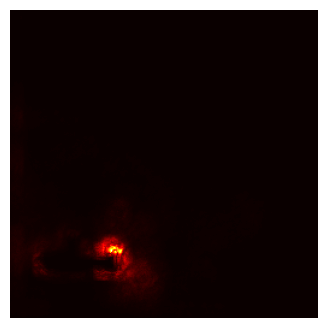

In [11]:
# # First test of Salency maps, kept for personnal interest. You may want to run it by curiosity

# from tensorflow import keras
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize
# from tf_keras_vis.utils.scores import CategoricalScore
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Load your model
# # model_ready = load_model(r'CNN_ResNet_classic_data.h5')
# # model_ready =  keras.models.load_model(r'CNN_ResNet_classic_data.h5')
# # model_ready =  keras.models.load_model(r'CNN_ResNet_classic_data.h5')
# # model_ready =  keras.models.load_model(r'CNN_ResNet_mask_data.h5')
# model_ready = keras.models.load_model(r'Baseline_run_on_mask_data.h5')
# # Prepare the image
# path_data_to_test = r"C:\Users\bapti\Downloads\Mask_data_ready\Test\LEFT\Trout\IMG_7946_processed.jpg"

# #For UBUNTU:
# path_data_to_test = Path('/mnt/c/Users/bapti/Downloads/Mask_data_ready/Test/LEFT/Trout/IMG_7946_processed.jpg')
# # path_data_to_test = Path('/mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/LEFT/Trout/IMG_7946.jpg')
# print(model_ready.input_shape)

# img = load_img(path_data_to_test, target_size=(256, 256)) # CHANGE THE RESIZE FOR THE CORECT MODEL + HAVE THE RIGHT PREPROCESSING FUNCTION
# x = img_to_array(img)  # Convert to numpy array
# x = x.reshape((1,) + x.shape)  # Add batch dimension
# x = x / 255.0  # Normalize image data if your model expects normalized inputs

# # Convert the last activation layer to linear
# model_ready.layers[-1].activation = None  # For TensorFlow 2.x compatibility

# # Define the class index you want to visualize
# class_index = 0  # Change this to match your target class index
# score = CategoricalScore([class_index])

# # Create Saliency object
# saliency = Saliency(model_ready, clone=False)

# # Generate saliency map
# saliency_map = saliency(score, x, smooth_samples=20, smooth_noise=0.2)
# saliency_map = normalize(saliency_map)  # Normalize values for visualization

# # Plot saliency map
# plt.figure(figsize=(5, 4))
# plt.imshow(saliency_map[0], cmap='hot')
# plt.axis('off')
# plt.show()


3.1 Load the test dataset

In [ ]:
import time
from pathlib import Path
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.scores import CategoricalScore

# Start the timer
start_time = time.time()

# Define the base directory for the test data
base_dir = Path('/mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test')
#base_dir = Path('/mnt/c/Users/bapti/Downloads/Mask_data_ready/Test')

# Initialize an empty list to hold test data
test_data = []

# Check if the base directory exists
if not base_dir.exists():
    raise ValueError(f"Base directory does not exist: {base_dir}")

# Loop through the 'LEFT' and 'RIGHT' directories
for class_name in ["LEFT", "RIGHT"]:
    class_dir = base_dir / class_name
    print(f"Checking class directory: {class_dir}")
    
    if not class_dir.exists():
        print(f"Class directory does not exist: {class_dir}")
        continue

    for species_name in ["Grayling", "Trout"]:
        species_dir = class_dir / species_name
        print(f"Checking species directory: {species_dir}")
        
        if not species_dir.exists():
            print(f"Species directory does not exist: {species_dir}")
            continue
        
        # List all image files in the directory
        for image_file in species_dir.glob('*.*'):
            if image_file.is_file():  # Ensure it's an actual file
                item = {
                    "path": image_file,
                    "class": class_name,
                    "species": species_name
                }
                test_data.append(item)

# Check if test_data is populated
print(f"Number of test data items: {len(test_data)}")


3.2 Load the model (you may manualy chose whichever you prefer)

In [ ]:
# Load model
model_ready = keras.models.load_model(r'CNN_ResNet_classic_data.h5')

3.3 Preprocess the data (you may change adapt the target size to 224 for ResNet and 256 for Baseline and Augmented baseline models)

In [ ]:
# Ensure test data is populated correctly
if len(test_data) == 0:
    raise ValueError("Test data is empty. Please check the data loading process.")

# Image preprocessing function
def image_path_to_array(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)  # Resize to the target size
    image_array = np.array(image)  # Convert to numpy array
    image_array = image_array / 255.0  # Normalize to [0, 1]
    return image_array

# Get the actual images and their corresponding filenames
test_images = np.array([image_path_to_array(item["path"]) for item in test_data])  # Load images and convert to arrays
print(f"Shape of test_images before reshape: {test_images.shape}")

# Ensure the test_images are in the correct shape (num_samples, 256, 256, 3)
test_images = test_images.reshape(-1, 224, 224, 3)  # Explicitly reshape
print(f"Shape of test_images after reshape: {test_images.shape}")

filenames = [item["path"].name for item in test_data]  # Extract filenames for reference

# Convert class labels to 0 (LEFT) and 1 (RIGHT)
test_labels = [1 if item["class"] == "RIGHT" else 0 for item in test_data]
print(f"Number of test labels: {len(test_labels)}")


3.4 Get the best and worst predictions

In [ ]:
# Get model predictions
predictions = model_ready.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class indices

# Check if predicted_classes has the correct shape
print(f"Shape of predicted_classes: {predicted_classes.shape}")
if len(predicted_classes) != len(test_labels):
    raise ValueError(f"Mismatch between predicted classes and test labels. "
                     f"Predicted: {len(predicted_classes)}, Labels: {len(test_labels)}")

# Correct and wrong predictions
correct_preds = predicted_classes == test_labels
wrong_preds = ~correct_preds

# Calculate best and worst confidence
best_idx = None
worst_idx = None

if np.any(correct_preds):
    best_confidence = predictions[correct_preds, predicted_classes[correct_preds]]
    global_correct_indices = np.where(correct_preds)[0]
    best_idx = global_correct_indices[np.argmax(best_confidence)]
else:
    print("No correct predictions found.")

if np.any(wrong_preds):
    worst_confidence = predictions[wrong_preds, predicted_classes[wrong_preds]]
    global_wrong_indices = np.where(wrong_preds)[0]
    worst_idx = global_wrong_indices[np.argmin(worst_confidence)]
else:
    print("No wrong predictions found.")


# Define class mapping
class_mapping = {0: "LEFT", 1: "RIGHT"}

# Display best and worst prediction details
if best_idx is not None:
    best_image = test_images[best_idx]
    best_label = test_labels[best_idx]
    best_filename = filenames[best_idx]
    best_pred_class = predicted_classes[best_idx]
    best_pred_value = predictions[best_idx][best_pred_class]

    print(f"Best Prediction Details:")
    print(f"Index: {best_idx}, True Label: {class_mapping[best_label]}, Predicted Class: {class_mapping[best_pred_class]}")
    print(f"Confidence: {best_pred_value:.4f}, Filename: {best_filename}")

if worst_idx is not None:
    worst_image = test_images[worst_idx]
    worst_label = test_labels[worst_idx]
    worst_filename = filenames[worst_idx]
    worst_pred_class = predicted_classes[worst_idx]
    worst_pred_value = predictions[worst_idx][worst_pred_class]

    print(f"Worst Prediction Details:")
    print(f"Index: {worst_idx}, True Label: {class_mapping[worst_label]}, Predicted Class: {class_mapping[worst_pred_class]}")
    print(f"Confidence: {worst_pred_value:.4f}, Filename: {worst_filename}")

# Find all indices with the highest confidence among correct predictions (best case)
if np.any(correct_preds):
    best_confidence = predictions[correct_preds, predicted_classes[correct_preds]]
    global_correct_indices = np.where(correct_preds)[0]
    best_idx = global_correct_indices[np.argmax(best_confidence)]
    # Find indices where confidence matches the highest value
    duplicate_best_indices = global_correct_indices[best_confidence == max_confidence]
    
    # Print the number of "best" predictions
    num_best_predictions = len(duplicate_best_indices)
    print(f"Number of best predictions with the highest confidence ({max_confidence:.4f}): {num_best_predictions}")
    
    # Optional: Print their details if needed
    if num_best_predictions > 1:
        print("Details of the best predictions:")
        for idx in duplicate_best_indices:
            print(f" - Filename: {filenames[idx]}, True Label: {class_mapping[test_labels[idx]]}, "
                  f"Predicted: {class_mapping[predicted_classes[idx]]}")
else:
    print("No correct predictions found to determine 'best' cases.")
    # Check for duplicates
    max_confidence = np.max(best_confidence)
    duplicate_best_indices = global_correct_indices[best_confidence == max_confidence]
    
    if len(duplicate_best_indices) > 1:
        print(f"Multiple best predictions found with the same confidence ({max_confidence:.4f}):")
        for idx in duplicate_best_indices:
            print(f" - Filename: {filenames[idx]}, True Label: {class_mapping[test_labels[idx]]}, "
                  f"Predicted: {class_mapping[predicted_classes[idx]]}")
    else:
        print(f"No duplicate best predictions found.")

# Find all indices with the lowest confidence among incorrect predictions (worst case)
if np.any(wrong_preds):
    worst_confidence = predictions[wrong_preds, predicted_classes[wrong_preds]]
    global_wrong_indices = np.where(wrong_preds)[0]
    worst_idx = global_wrong_indices[np.argmin(worst_confidence)]
    
    # Check for duplicates
    min_confidence = np.min(worst_confidence)
    duplicate_worst_indices = global_wrong_indices[worst_confidence == min_confidence]
    
    if len(duplicate_worst_indices) > 1:
        print(f"Multiple worst predictions found with the same confidence ({min_confidence:.4f}):")
        for idx in duplicate_worst_indices:
            print(f" - Filename: {filenames[idx]}, True Label: {class_mapping[test_labels[idx]]}, "
                  f"Predicted: {class_mapping[predicted_classes[idx]]}")
    else:
        print(f"No duplicate worst predictions found.")


3.5 Plot the Saliency maps 

Checking class directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/LEFT
Checking species directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/LEFT/Grayling
Checking species directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/LEFT/Trout
Checking class directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/RIGHT
Checking species directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/RIGHT/Grayling
Checking species directory: /mnt/c/Users/bapti/Downloads/ML_Project/Data_ready/Test/RIGHT/Trout
Number of test data items: 843


Shape of test_images before reshape: (843, 224, 224, 3)
Shape of test_images after reshape: (843, 224, 224, 3)
Number of test labels: 843
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 530ms/step
Shape of predicted_classes: (843,)
Best Prediction Details:
Index: 0, True Label: LEFT, Predicted Class: LEFT
Confidence: 1.0000, Filename: IMG_8619.jpg
Worst Prediction Details:
Index: 756, True Label: RIGHT, Predicted Class: LEFT
Confidence: 0.7619, Filename: IMG_8464.jpg
Number of best predictions with the highest confidence (1.0000): 610
Details of the best predictions:
 - Filename: IMG_8619.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8620.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8621.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8622.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8623.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8624.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG_8631.jpg, True Label: LEFT, Predicted: LEFT
 - Filename: IMG

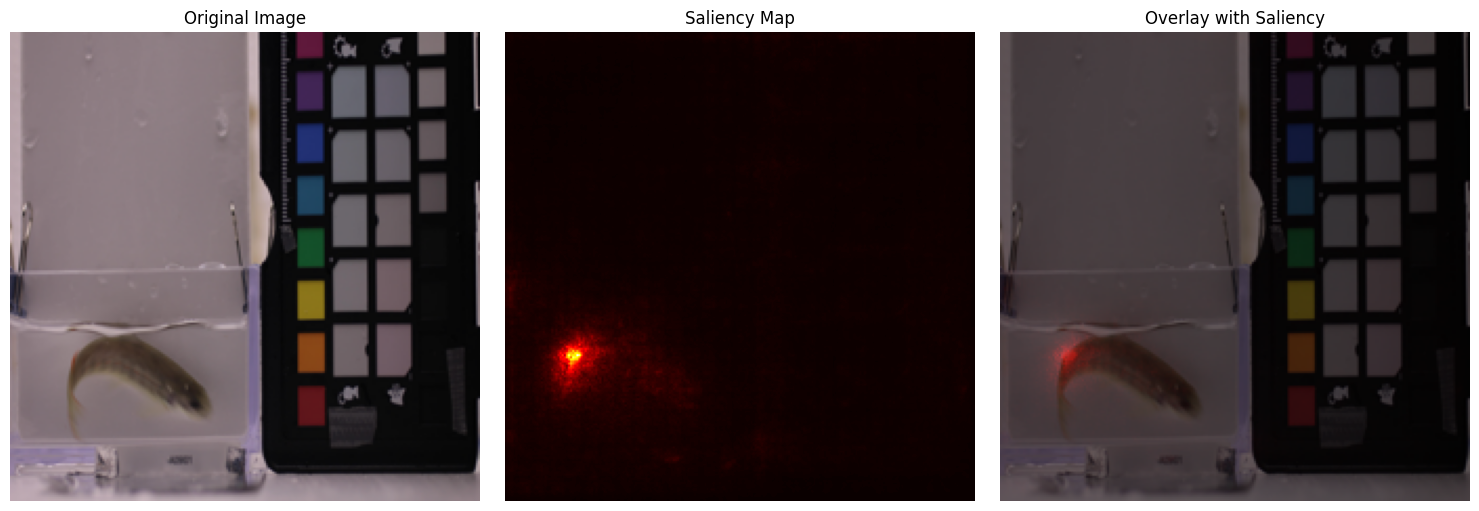

Plotting saliency map for best prediction (Index: 0, True Label: LEFT, Predicted: LEFT, Filename: IMG_8619.jpg)


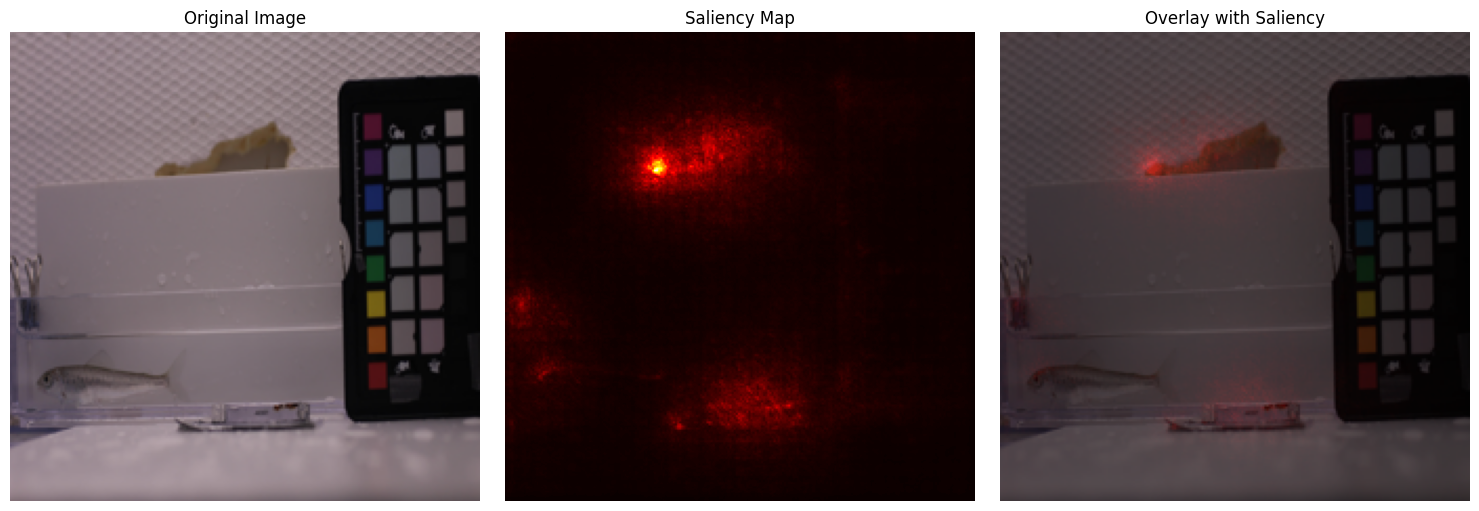

Processing time: 164.46736598014832 seconds


In [3]:
# Define function to plot saliency map
def plot_saliency_map(image, model, class_index, smooth_samples=20, smooth_noise=0.2):
    x = image.reshape((1,) + image.shape)  # Add batch dimension
    
    # Ensure normalization
    if x.max() > 1:
        x = x / 255.0  # Normalize if required
    
    model.layers[-1].activation = None  # Set the last layer activation to linear for saliency
    
    score = CategoricalScore([class_index])
    saliency = Saliency(model, clone=False)
    
    saliency_map = saliency(score, x, smooth_samples=smooth_samples, smooth_noise=smooth_noise)
    saliency_map = normalize(saliency_map)  # Normalize for visualization
    
    # Rescale and prepare for visualization
    saliency_map_rescaled = (saliency_map[0] - saliency_map[0].min()) / (saliency_map[0].max() - saliency_map[0].min())
    saliency_map_rescaled = np.clip(saliency_map_rescaled * 1.5, 0, 1)
    saliency_map_rescaled = np.uint8(255 * saliency_map_rescaled)
    
    # Create a red-highlighted colormap
    saliency_colormap = np.zeros((*saliency_map_rescaled.shape, 3), dtype=np.uint8)
    saliency_colormap[..., 0] = saliency_map_rescaled
    
    # Original image preparation
    original_image = np.clip(x[0], 0, 1)  # Clamp values to [0, 1]
    original_image = np.uint8(original_image * 255)  # Scale to 0-255
    
    # Blend original image and saliency map
    alpha = 0.5
    blended = np.uint8(original_image * (1 - alpha) + saliency_colormap * alpha)
    
    # Plot original, saliency map, and overlay
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image.astype('uint8'))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Saliency Map')
    plt.imshow(saliency_map[0], cmap='hot')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Overlay with Saliency')
    plt.imshow(blended)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot saliency maps for the best and worst predictions
if worst_idx is not None:
    print(f"Plotting saliency map for worst prediction (Index: {worst_idx}, True Label: {class_mapping[worst_label]}, Predicted: {class_mapping[worst_pred_class]}, Filename: {worst_filename})")
    plot_saliency_map(worst_image, model_ready, np.argmax(predictions[worst_idx]))

print(f"Plotting saliency map for best prediction (Index: {best_idx}, True Label: {class_mapping[best_label]}, Predicted: {class_mapping[best_pred_class]}, Filename: {best_filename})")
plot_saliency_map(best_image, model_ready, np.argmax(predictions[best_idx]))

# Processing time
print(f"Processing time: {time.time() - start_time} seconds")
